# Oscillation in eeg 

In [2]:
%load_ext autoreload
%autoreload 2

In [21]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
import scipy as sp

import mne 

warnings.filterwarnings('ignore')

Pas µV mais des mV 
Sampling rate = 250 Hz 
Filtre harr wavelet filter 
cut le sigal en plusieurs petites parties => 2 avant le gap 
durée totale aproximativement 1h30

In [19]:
sampling_rate = 250 # in seconds
time = 1/sampling_rate
unit_time = 's'


## Etude sur 10 min avec les données bruts 

Text(0.5, 1.0, 'EEG signal')

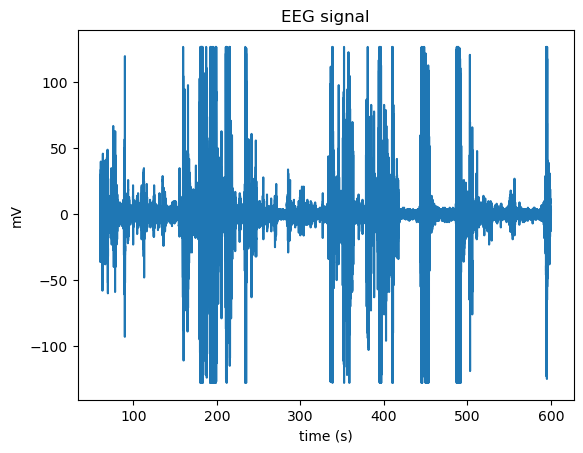

In [20]:
start = 60 # in seconds
end = 600 # in seconds 
df = pd.read_csv('../data/EEGArchi13mPFC.txt')
df = df.iloc[int(start*sampling_rate):int(end*sampling_rate)] # Si on veut ne sélectionner qu'une partie du signal 
df['time'] = df.index * time
df.rename(columns={'0': 'mV'}, inplace=True)
plt.plot(df['time'], df['mV'])
plt.xlabel(f'time ({unit_time})')
plt.ylabel('mV')
plt.title('EEG signal')

## Test with mne 

Creating RawArray with float64 data, n_channels=1, n_times=135000
    Range : 0 ... 134999 =      0.000 ...   539.996 secs
Ready.
Effective window size : 8.192 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


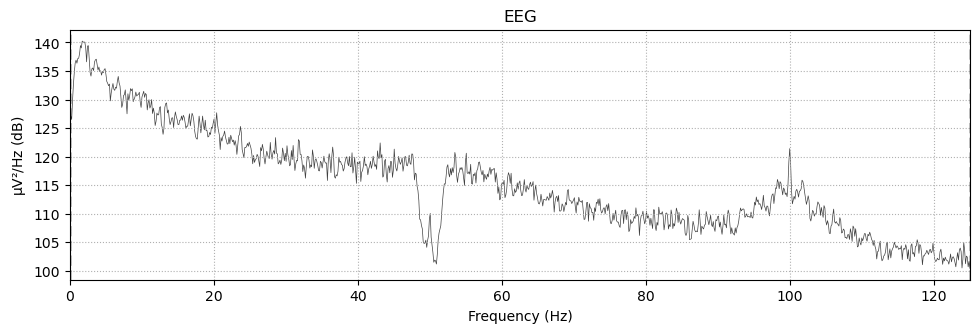

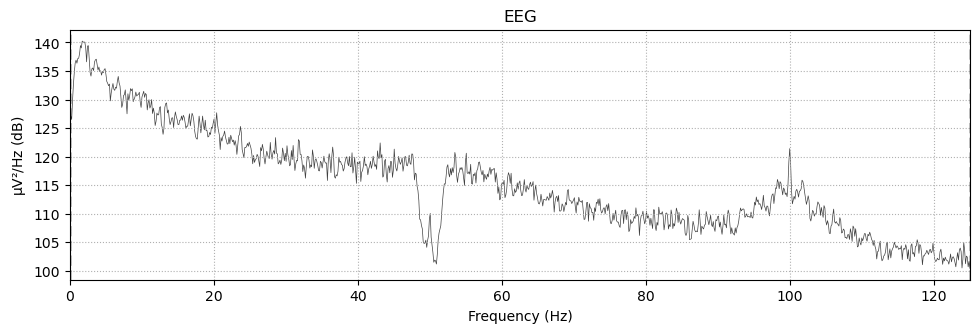

In [28]:
import numpy as np 
data = np.array([df['mV']])
info = mne.create_info(ch_names=['eeg'],
                       ch_types=['eeg'],
                       sfreq=sampling_rate)

simulated_raw = mne.io.RawArray(data, info)
simulated_raw.plot_psd()

## Ajout des données du choice phase 

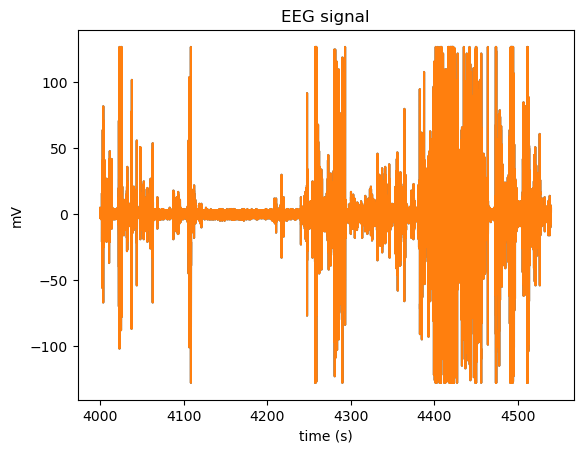

In [40]:
start = 4000 # in seconds
end = 4540 # in seconds 
df_choice = pd.read_csv('../data/EEGArchi13mPFC.txt')
df_choice = df_choice.iloc[int(start*sampling_rate):int(end*sampling_rate)]
df_choice['time'] = df_choice.index * time
df_choice.rename(columns={'0': 'mV'}, inplace=True)
plt.plot(df_choice['time'], df_choice['mV'])
plt.xlabel(f'time ({unit_time})')
plt.ylabel('mV')
plt.title('EEG signal')
plt.show()

In [48]:
data = np.array([df['mV'], df_choice['mV']])
info = mne.create_info(ch_names=['eeg']*2,
                       ch_types=['eeg']*2,
                       sfreq=sampling_rate)

simulated_raw = mne.io.RawArray(data, info)
simulated_raw.plot_psd()

Creating RawArray with float64 data, n_channels=2, n_times=135000
    Range : 0 ... 134999 =      0.000 ...   539.996 secs
Ready.


TypeError: plot_psd() got an unexpected keyword argument 'bgcolor'

## 1 Fourier transform

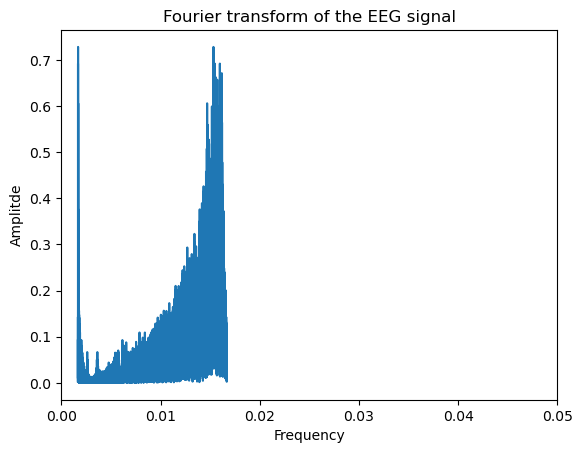

In [37]:
import scipy as sp 
import scipy.fftpack
import numpy as np

df_f = df.copy()
df_f['amplitude'] = sp.fftpack.fft(df_f['mV'])/len(df_f['mV'])
df_f["freq"] = 1/df_f['time']
plt.plot(df_f['freq'], np.abs(df_f['amplitude']))
plt.xlabel(f'Frequency')
plt.xlim(0, 0.05)
plt.ylabel('Amplitde')
plt.title('Fourier transform of the EEG signal')
plt.show()

- gamma = 30 Hz 
- Theta = 5-12 Hz

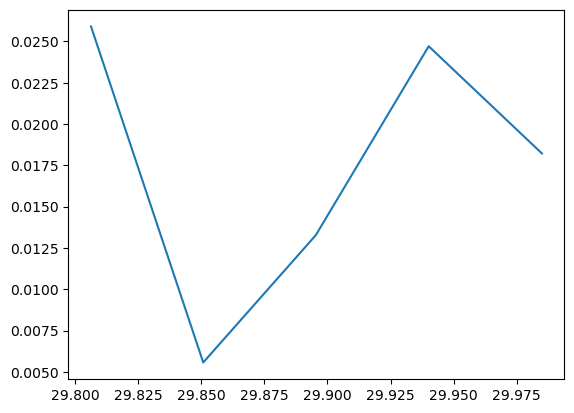

In [14]:
dd = df_f.copy()
dd = dd[dd['freq'] < 30.01]
dd = dd[dd['freq'] > 29.8]
dd = dd.sort_values(by='freq')
# plt.plot(dd['freq'], np.abs(dd['amplitude']))

peut être une normalisation a faire

## Article 

Fig1A

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


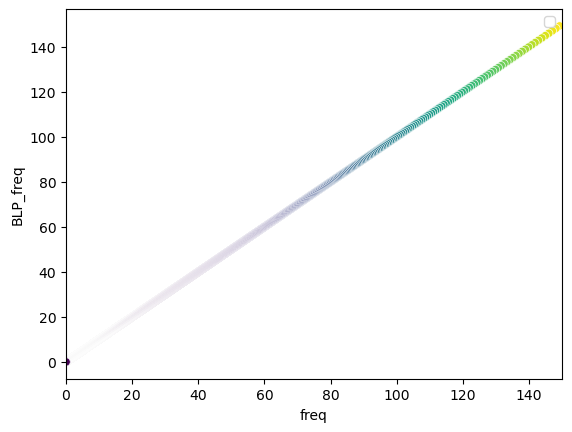

In [15]:
htmap = pd.DataFrame()
htmap["freq"] = 1/df_f["time"]
htmap = htmap[htmap["freq"] < 150]
# change the calculation of the BLP_freq and power
htmap["BLP_freq"] = np.abs(htmap["freq"])
htmap["power"] = htmap["BLP_freq"]**2
sns.scatterplot(data = htmap, x = "freq", y = "BLP_freq",hue="power", palette="viridis", legend=False)
plt.xlim(0,150)
plt.legend()

In [62]:
htmap = htmap.set_index(['freq'])
htmap.drop(columns=['power'], inplace=True)

KeyError: "None of ['freq'] are in the columns"

sns.heat

## Create heatmap
sur l'intervalle bio possible 

In [51]:
range_min = 0
range_max = 150
df_f["freq"] = 1/df_f["time"]
df_f = df_f[(df_f["freq"] > range_min) & (df_f["freq"] < range_max)]
df_f

,µV,time,amplitude,freq
134,1,0.00670,-0.001105-0.002105j,149.253731
135,1,0.00675,-0.001030+0.000486j,148.148148
136,0,0.00680,-0.004670+0.000379j,147.058824
137,-3,0.00685,-0.002098+0.000958j,145.985401
138,-1,0.00690,0.002699+0.003603j,144.927536
...,...,...,...,...
1739494,0,86.97470,-0.003865+0.003142j,0.011498
1739495,0,86.97475,0.003693-0.001373j,0.011498
1739496,0,86.97480,0.004371-0.001578j,0.011498
1739497,0,86.97485,-0.002863-0.002170j,0.011498


In [52]:
# htmap = df_f.copy()
# htmap = htmap.drop(columns=['µV'])
# sns.heatmap(htmap, annot=True)